## Machine Learning with Additive Manufacturing

Additive manufacturing is the process of building from a computer controlled 3-dimensional printer. The material can be polymer (plastic), ceramic, metallic powder, liquid, or any material that is joined together through deposition, solidification, or fusion. It speeds the development of prototypes by precisely converting a computer aided design (CAD) drawing into a physical device. Additive manufacturing can be either a prototype or scaled up to full product production, but typically for applications that require customization or with low production volumes.

A 3D print data set of additive manufacturing test conditions is available for Polylactic Acid (PLA) and Acrylonitrile Butadiene Styrene (ABS). PLA can print at lower temperatures of 180°C compared to 250°C for ABS. PLA is more brittle than ABS and is not typically suitable for high strength applications. The data was collected by researchers in the Mechanical Engineering department at Selçuk Üniversitesi on a Ultimaker S5 3D printer. The study focused on how the parameters in a specific 3D printer affects the print quality, accuracy and final part strength. This work is based on the settings and PLA or ABS filaments. Material and strength tests were carried out on a Sincotec GMBH tester capable of pulling 20 kN.

![Python Machine Learning](https://apmonitor.com/pds/uploads/Main/additive_manufacturing.png)

Nine parameters were adjusted for the Ultimaker S5 3D printer.

- Layer Height (mm)
- Wall Thickness (mm)
- Infill Density (%)
- Infill Pattern (Honeycomb or Grid)
- Nozzle Temperature (ºC)
- Bed Temperature (ºC)
- Print Speed (mm/s)
- Material (PLA or ABS)
- Fan Speed (%)

After the part was manufactured, three parameters were measured for each product.

- Roughness (µm)
- Tension Strength (MPa)
- Elongation (%)

The labeled data is a combination of PLA and ABS material, print patterns, and conditions with 66 samples from a first repository and 50 samples from a second repository. The [combined data set](http://apmonitor.com/pds/uploads/Main/manufacturing.txt) is 70 samples with the duplicates removed and one outlier added.

```python
url = 'http://apmonitor.com/pds/uploads/Main/manufacturing.txt'
```

The label associated with each filament is pla or abs. The print pattern is grid or honeycomb. The full problem statement is on the [Machine Learning for Engineers course website](https://apmonitor.com/pds/index.php/Main/AdditiveManufacturing).

### Import Packages

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

### Import Data

In [19]:
import io
import requests

url = 'http://apmonitor.com/pds/uploads/Main/manufacturing.txt'

s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

display(data.head())

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7


## Part 1: Data Visualization and Cleansing

### Summary Statistics

Generate summary information to [statistically describe the data](https://apmonitor.com/pds/index.php/Main/StatisticsMath).

In [20]:
data.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.097286,5.464286,54.600000,221.785714,73.214286,68.857143,48.614286,155.185714,19.942857,1.642143
std,0.061971,2.934455,27.926612,14.843037,24.197792,45.501803,36.060454,96.070520,9.282812,0.756596
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.000000,0.000000,-1.000000,4.000000,0.400000
25%,0.052500,3.000000,32.500000,210.000000,65.000000,40.000000,25.000000,75.000000,12.000000,1.100000
50%,0.100000,5.500000,50.000000,220.000000,70.000000,60.000000,50.000000,141.000000,18.500000,1.500000
75%,0.150000,8.000000,80.000000,230.000000,75.000000,63.750000,75.000000,218.000000,27.000000,2.175000
max,0.200000,12.000000,100.000000,250.000000,260.000000,360.000000,100.000000,368.000000,38.000000,3.300000


Check for balanced classification dataset ('abs' and 'pla' should have about equal amounts)

In [21]:
data['material'].value_counts()

,count
material,
abs,36
pla,34


### Convert String Categories (Text) to Binary (0 or 1)

One-hot encoding translates character labels into a binary representation (0 or 1) for classification. Translate __material__ and __infill_pattern__ into a binary form. Investigate the data types with `data.dtypes`.

In [22]:
data['material_binary'] = data['material'].map({'abs': 0, 'pla': 1})
data['pattern_binary'] = data['infill_pattern'].map({'grid': 0, 'honeycomb': 1})

In [17]:
data.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation,material_binary,pattern_binary
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000
mean,0.097286,5.464286,54.600000,221.785714,73.214286,68.857143,48.614286,155.185714,19.942857,1.642143,0.485714,0.50000
std,0.061971,2.934455,27.926612,14.843037,24.197792,45.501803,36.060454,96.070520,9.282812,0.756596,0.503405,0.50361
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.000000,0.000000,-1.000000,4.000000,0.400000,0.000000,0.00000
25%,0.052500,3.000000,32.500000,210.000000,65.000000,40.000000,25.000000,75.000000,12.000000,1.100000,0.000000,0.00000
50%,0.100000,5.500000,50.000000,220.000000,70.000000,60.000000,50.000000,141.000000,18.500000,1.500000,0.000000,0.50000
75%,0.150000,8.000000,80.000000,230.000000,75.000000,63.750000,75.000000,218.000000,27.000000,2.175000,1.000000,1.00000
max,0.200000,12.000000,100.000000,250.000000,260.000000,360.000000,100.000000,368.000000,38.000000,3.300000,1.000000,1.00000


### Data Cleansing

There is one row that contains an outlier. Identify the outlier with boxplots.

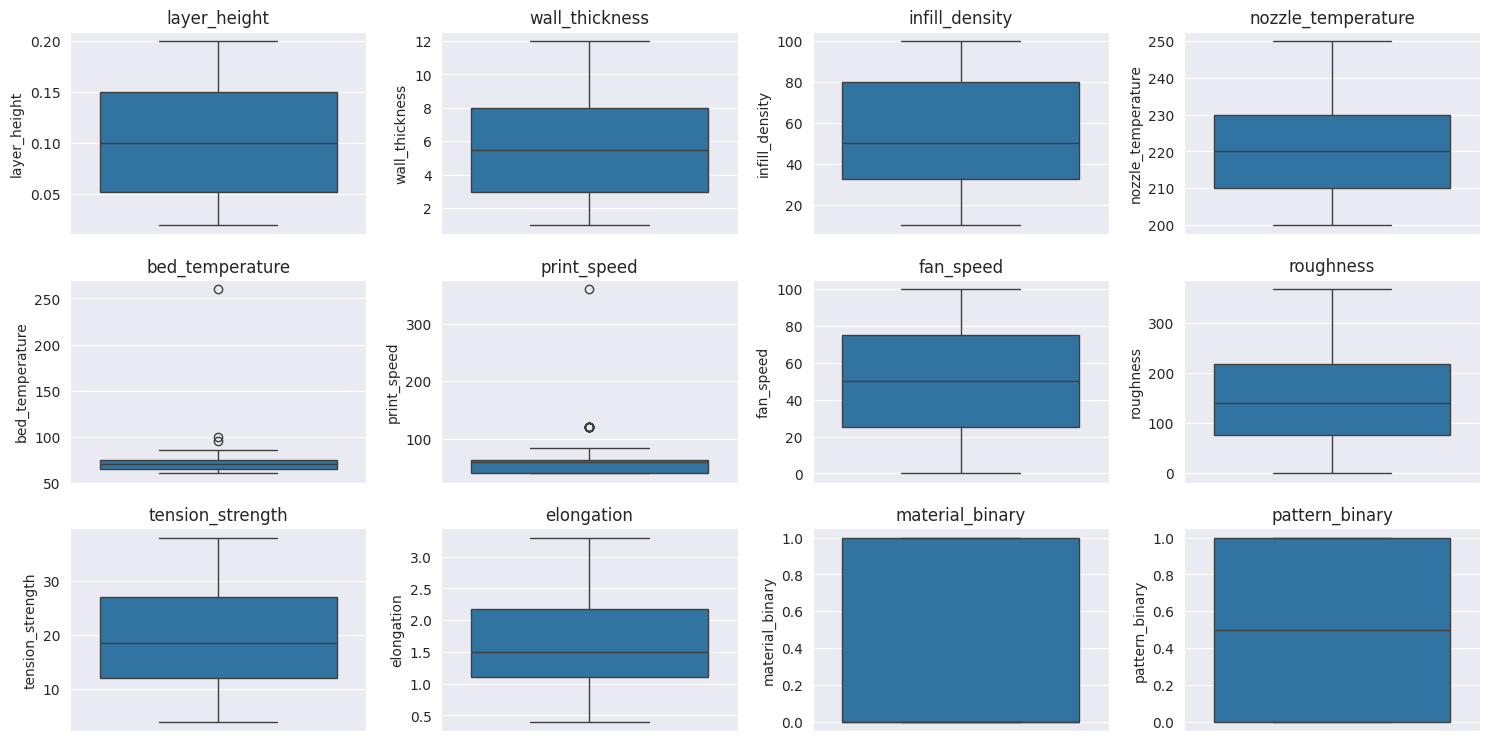

In [23]:
plt.figure(figsize=(15, 10))


for i, column in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(4, 4, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Remove the row that contains the outlier.

In [24]:
data = data[data['print_speed'] < 300]


Verify that the outlier is removed with another box plot.

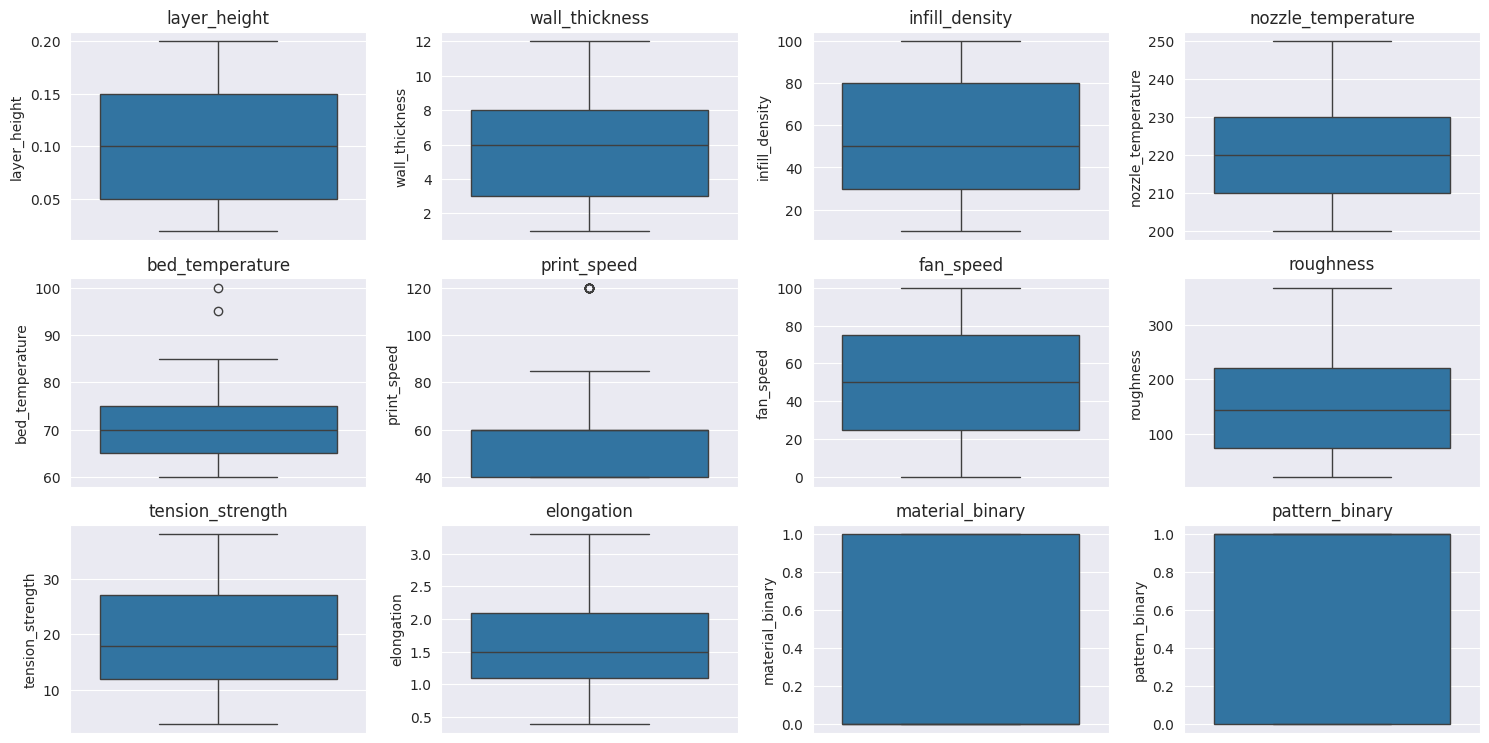

In [26]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(4, 4, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### Data Correlation

Generate a heat map of the data correlation.

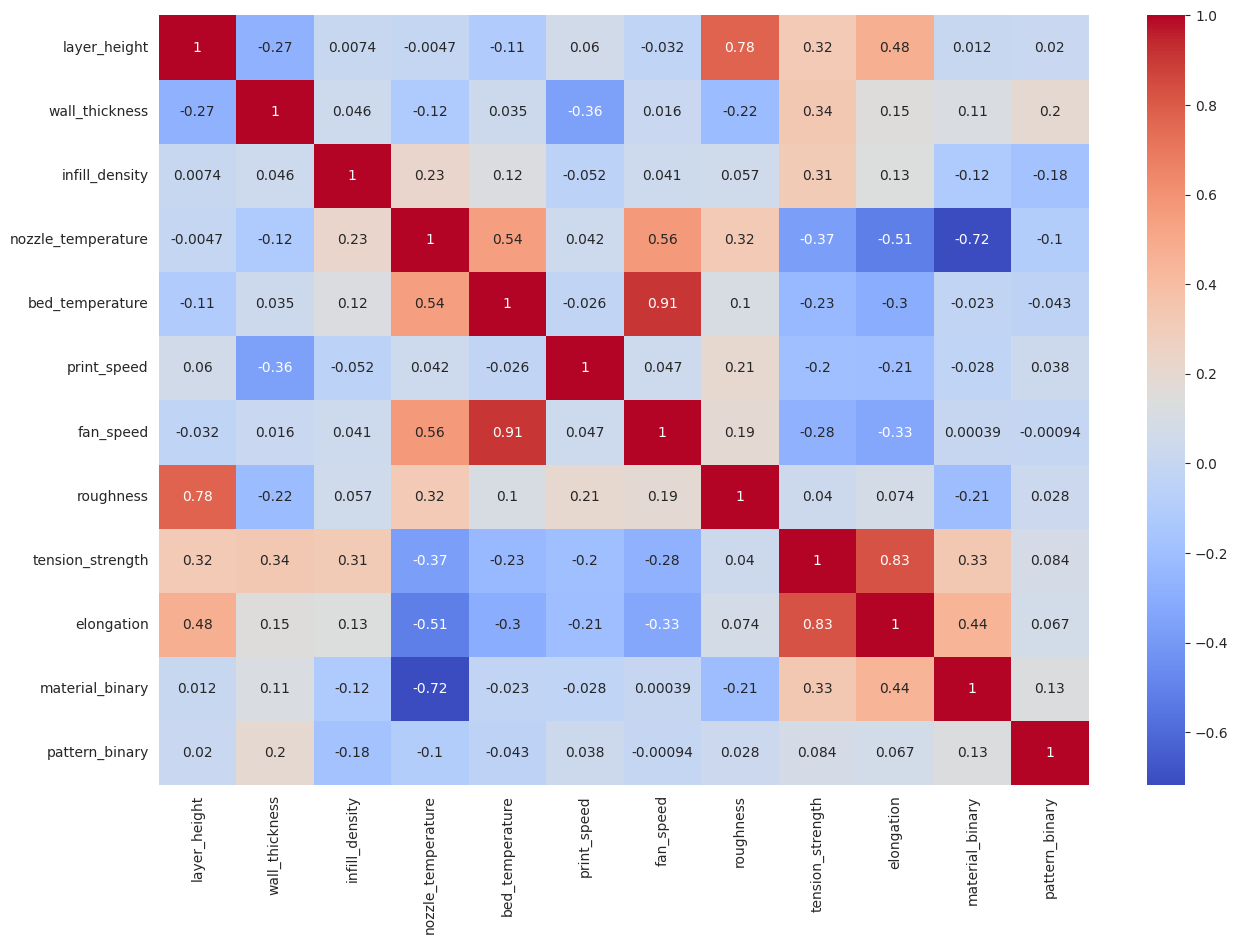

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.drop(columns=['material', 'infill_pattern']).corr(), annot=True, cmap='coolwarm')
plt.show()

### Data Distributions and Pair Plot

<Figure size 1500x1000 with 0 Axes>

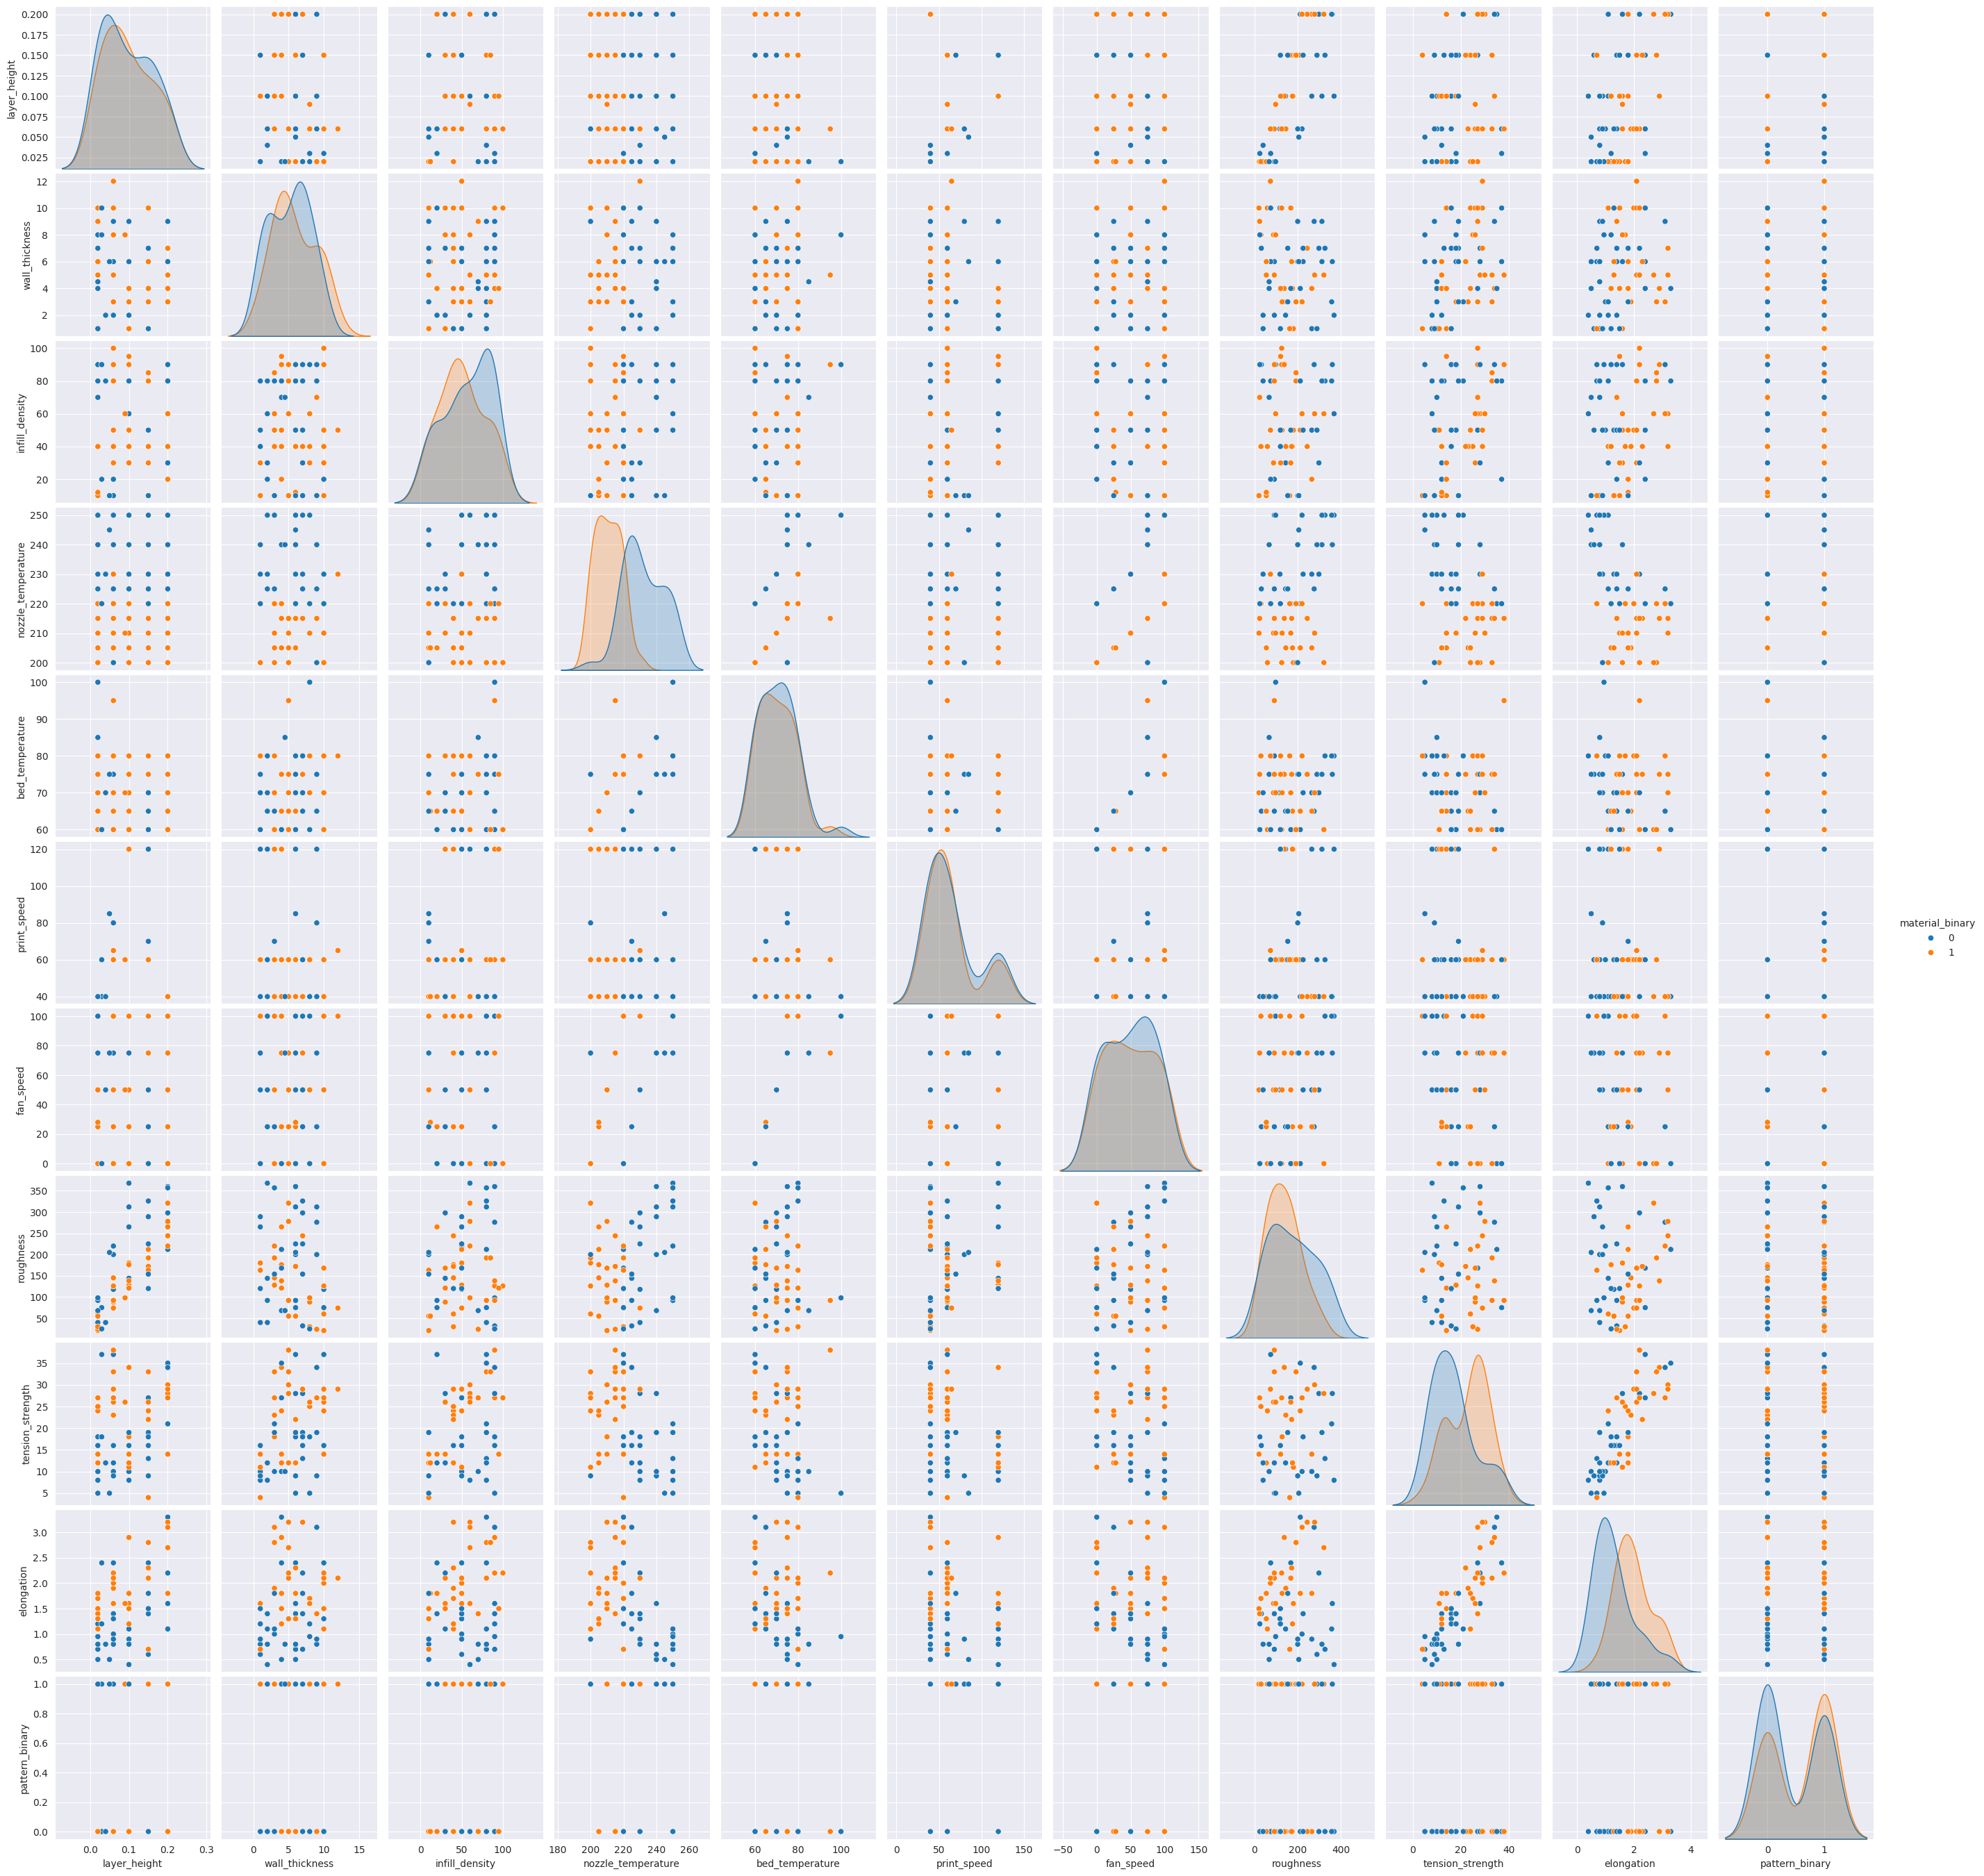

In [29]:
plt.figure(figsize=(15, 10))
sns.pairplot(data.drop(columns=['material', 'infill_pattern']), hue='material_binary')
plt.show()

## Part 2: Classification

Train and test a classifier to distinguish between PLA and ABS filament material. Test at least 8 classifiers of your choice. Recommend a best classifier among the 8 that are tested.

### Divide Input Features (X) and Output Label (y)

Divide the data into sets that contain the input features (X) and output label (y=`material`). Save data feature columns with `X_names=list(data.columns)` and remove `material` with `X_names.remove('material')`.

### Data scaling

Scale the input features with a `StandardScaler` or a `MinMaxScaler`. Why do classifiers return an error if the output label is scaled with `StandardScaler`?

### Train / Test Split

Randomly select values that split the data into a train (80%) and test (20%) set by using the sklearn `train_test_split` function with `shuffle=True`.

### Evaluate the Best Features

Use `SelectKBest` to evaluate the best features for the classifier.

### Train (fit) and Test Classification with Logistic Regression

### Train 8 Classifiers

Create 8 classifier objects and train.

### Classifier Evaluation

Report the confusion matrix on the test set for each classifier. Discuss the performance of each. A confusion matrix shows correct classification (diagonals) and incorrect classification (off-diagonals) groups from the test set. Generate a confusion matrix for each classifier.

## Part 3: Regression

Develop a regression model to predict Tension Strength (MPa). Compare predicted PLS and ABS tension strength with the regression model.

### Scale Data

Scale `data` with `StandardScaler` or `MinMaxScaler`.

### Select Input Features (X) and Output Label (y)

Using the 9 machine settings as the input features.

- Layer Height (mm)
- Wall Thickness (mm)
- Infill Density (%)
- Infill Pattern (Honeycomb or Grid)
- Nozzle Temperature (ºC)
- Bed Temperature (ºC)
- Print Speed (mm/s)
- Material (PLA or ABS)
- Fan Speed (%)

The output label is the `tension_strength`.

- Tension Strength (MPa)

Divide the data into sets that contain the input features (X) and output label (y=`tension_strength`). Save data feature columns with `X_names=list(data.columns)[0:9]`.

### Split Data

Randomly select values that split the data into a train (80%) and test (20%) set.

### Regression Fit

Use 3 regression methods. Use Linear Regression, Neural Network (Deep Learning), and another regression method of your choice. Discuss the performance of each. Possible regression methods are:

- Linear Regression
- Neural Network (Deep Learning)
- K-Nearest Neighbors
- Support Vector Regressor

### Validation

Report the correlation coefficient ($R^2$) for the train and test sets.

### Parity Plot

A parity plot is a scatter plot with predicted versus measured. A parity plot of the training and test data is a good way to see the overall fit of tension strength.

### Material Strength: PLA versus ABS

There is concern that PLA has less strength than ABS for additive manufacturing. Select the only the PLA data and compare the PLA and ABS predicted strength. One way to compare the strength is to change the material to ABS and recalculate the predicted Tension Strength (MPa). What is the relative strength of PLA versus ABS?